In [12]:
%load_ext autoreload
%autoreload 2
import numpy as np
import gym
from main.maml_agent import MAMLAgent, MAMLDynamics, register_flags
register_flags()
from main.alpaca import *
from main.dataset import *
from main.dataViz import *
import yaml

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
cfg_filename = 'configs/swerving-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.load(ymlfile)

In [3]:
import pandas as pd
trajs = pd.read_pickle("data/trajectories_slim.pkl")

In [4]:
# build traj dataset 
traj_mat = np.zeros((1106,33,8))
traj_mat_p = np.zeros((1106,33,8))
for i,label in enumerate(['x1', 'y1', 'xd1', 'yd1', 'x2', 'y2','xd2', 'yd2']):
    itr = -1
    for k,v in trajs[label].items():
        if k[1] == 0:
            itr += 1
        if k[1] < 33:
            traj_mat[itr,k[1],i] = v
        if (not (k[1] == 0)) and k[1]<34:
            traj_mat_p[itr,k[1]-1,i] = v

#shuffle this data
inds = np.random.choice(traj_mat.shape[0],traj_mat.shape[0])
traj_mat = traj_mat[inds,:,:]
traj_mat_p = traj_mat_p[inds,:,:]
            
N_train = 1000
N_test = 100
X = traj_mat[:1000,:,:]
Y = traj_mat_p[:1000,:,:] #- X

X_test = traj_mat[1000:1100,:,:]
Y_test = traj_mat_p[1000:1100,:,:] #- X_test

In [5]:
dataset = PresampledDataset(X,Y)
maml_dataset = PresampledDataset(X,Y-X) # MAML Agent asssums change in state as targets

## Default agent

In [6]:
g1 = tf.Graph()
sess1 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g1)
agent = AdaptiveDynamics(config, sess1, g1)

In [7]:
agent.construct_model()

In [8]:
agent.train(dataset,4000)

loss: 19.321184
loss: -36.057186
loss: -37.37591
loss: -39.852806
loss: -35.74457
loss: -39.592957
loss: -39.360657
loss: -38.77753
loss: -41.7994
loss: -39.26209
loss: -41.153946
loss: -38.630383
loss: -39.10588
loss: -40.054386
loss: -41.52416
loss: -40.481388
loss: -41.28732
loss: -41.281418
loss: -42.21055
loss: -41.30387
loss: -38.92493
loss: -38.63839
loss: -41.016827
loss: -42.217274
loss: -42.664707
loss: -39.918076
loss: -41.88746
loss: -39.995014
loss: -39.149742
loss: -40.802795
loss: -41.89855
loss: -42.160683
loss: -39.567616
loss: -38.849953
loss: -40.340633
loss: -39.61259
loss: -43.747055
loss: -39.86125
loss: -40.965702
loss: -39.00787
loss: -42.26273
loss: -41.571476
loss: -40.79655
loss: -42.182148
loss: -39.855515
loss: -41.820103
loss: -43.63775
loss: -39.272903
loss: -40.224857
loss: -40.83983
loss: -39.842117
loss: -42.986134
loss: -39.829716
loss: -41.13941
loss: -41.563087
loss: -42.720005
loss: -42.069725
loss: -40.695724
loss: -41.62639
loss: -41.675476
loss:

## No Meta Agent

In [9]:
g2 = tf.Graph()
sess2 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g2)
agent_nometa = AdaptiveDynamics(config,sess2,g2)
agent_nometa.config['data_horizon'] = 0
agent_nometa.construct_model()

In [10]:
agent_nometa.train(dataset, 2000)

loss: 59.60819
loss: -13.76777
loss: -18.640368
loss: -19.502113
loss: -22.139463
loss: -23.322882
loss: -25.33772
loss: -24.15594
loss: -25.434765
loss: -23.240166
loss: -26.202667
loss: -24.995403
loss: -26.291586
loss: -25.993305
loss: -27.41783
loss: -27.757568
loss: -27.889013
loss: -25.004883
loss: -26.868948
loss: -25.752502
loss: -26.991152
loss: -28.328308
loss: -26.918816
loss: -27.373098
loss: -28.72596
loss: -27.934967
loss: -27.24559
loss: -27.691471
loss: -28.076485
loss: -28.686188
loss: -28.668129
loss: -24.743639
loss: -27.491312
loss: -24.62235
loss: -27.047703
loss: -27.347136
loss: -27.419785
loss: -26.61227
loss: -29.147024
loss: -29.106937


## MAML Agent

In [13]:
g3 = tf.Graph()
sess3 = tf.Session(config=tf.ConfigProto(log_device_placement=True), graph=g3)
maml_model = MAMLDynamics(config, sess3,g3, exp_string="swerve_test")
maml_model.construct_model()

using sinusoid arch
INFO:tensorflow:Summary name metatrain_Pre-update loss is illegal; using metatrain_Pre-update_loss instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 1 is illegal; using metatrain_Post-update_loss__step_1 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 2 is illegal; using metatrain_Post-update_loss__step_2 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 3 is illegal; using metatrain_Post-update_loss__step_3 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 4 is illegal; using metatrain_Post-update_loss__step_4 instead.
INFO:tensorflow:Summary name metatrain_Post-update loss, step 5 is illegal; using metatrain_Post-update_loss__step_5 instead.
Restoring model weights from summaries/swerve_test/model24999
INFO:tensorflow:Restoring parameters from summaries/swerve_test/model24999


In [110]:
maml_model.train(maml_dataset, 15000)

Done initializing, starting training.
Pretrain Iteration 1000: 2105.2122, 1.5411372
Pretrain Iteration 2000: 9.062321, 0.70427525
Pretrain Iteration 3000: 0.03033607, 0.03590636
Pretrain Iteration 4000: 0.033290345, 0.03782547
Pretrain Iteration 5000: 0.02975278, 0.031974547
Pretrain Iteration 6000: 0.0335887, 0.0308053
Pretrain Iteration 7000: 0.032147028, 0.028296623
Pretrain Iteration 8000: 0.03141883, 0.0265863
Pretrain Iteration 9000: 0.030034263, 0.023689246
Iteration 0: 0.02941325, 0.023066929
Iteration 1000: 0.035483308, 0.025221905
Iteration 2000: 0.029749533, 0.023075718
Iteration 3000: 0.02817047, 0.02512588
Iteration 4000: 0.029395252, 0.02169444
Iteration 5000: 0.02988854, 0.023968123
Iteration 6000: 0.027215606, 0.019131586
Iteration 7000: 0.026791587, 0.018850278
Iteration 8000: 0.026990315, 0.01895899
Iteration 9000: 0.026210386, 0.017440308
Iteration 10000: 0.028980434, 0.019680455
Iteration 11000: 0.027771283, 0.01756111
Iteration 12000: 0.027501797, 0.01662932
Iterat

In [14]:
def plot_swerve(agent,X,Y,N_samples=30,T=33,T_rollout=12, ind=0):
    #plot trajs for each car
    plt.plot(X[ind,:,0],X[ind,:,1],color='k',linestyle=':', alpha=0.5)
    plt.plot(X[ind,:,4],X[ind,:,5],color='k', linestyle=':', alpha=0.5)
    for Nu in [0,10,20]:
        tt = np.arange(T+1)
        x_dim = Y.shape[2]
        actions = X[0,:,x_dim:]
        agent.reset_to_prior()
        for t in range(0,Nu):
            x = X[0,t,:x_dim]
            u = X[0,t,x_dim:]
            xp = Y[0,t,:]
            agent.incorporate_transition(x,u,xp)
            
        x_pred = np.zeros([N_samples, T+1, x_dim])
        x_pred[:,:Nu+1,:] = X[ind, :Nu+1, :x_dim]
        Ks = agent.sample_dynamics_matrices(N_samples)
        x_pred[:,Nu:,:] = agent.sample_rollout(X[ind,Nu,:], actions[Nu:,:], Ks)

        #plot trajs for each car
        colors = ['C0','C1']
        for j in range(N_samples):
            plt.plot(x_pred[j,Nu:Nu+T_rollout,0], x_pred[j,Nu:Nu+T_rollout,1], color=colors[0], alpha=5.0/N_samples)
            plt.plot(x_pred[j,Nu:Nu+T_rollout,4], x_pred[j,Nu:Nu+T_rollout,5], color=colors[1], alpha=5.0/N_samples)
        plt.plot(X[ind,Nu:Nu+T_rollout,0],X[ind,Nu:Nu+T_rollout,1],color='k',alpha=0.5)
        plt.plot(X[ind,Nu:Nu+T_rollout,4],X[ind,Nu:Nu+T_rollout,5],color='k',alpha=0.5)

def plot_swerve_maml(agent,X,Y,N_samples=30,T=33,T_rollout=12,ind=0):
    #plot trajs for each car
    plt.plot(X[ind,:,0],X[ind,:,1],color='k',linestyle=':', alpha=0.5)
    plt.plot(X[ind,:,4],X[ind,:,5],color='k', linestyle=':', alpha=0.5)
    for Nu in [0,10,20]:
        tt = np.arange(T+1)
        x_dim = Y.shape[2]
        actions = X[0,:,x_dim:]
        agent.reset_to_prior()
        for t in range(0,Nu):
            x = X[ind,t,:x_dim]
            u = X[ind,t,x_dim:]
            xp = Y[ind,t,:]
            agent.incorporate_transition(x,u,xp)


        x_pred = np.zeros([1, T+1, x_dim])
        x_pred[:,:Nu+1,:] = X[ind, :Nu+1, :x_dim]
        x_pred[:,Nu+1:,:] = agent.sample_rollout(x_pred[:,Nu,:], actions[Nu:,:])


        colors = ['C0','C1']
        plt.plot(x_pred[0,Nu:Nu+T_rollout,0], x_pred[0,Nu:Nu+T_rollout,1], color=colors[0], alpha=0.8)
        plt.plot(x_pred[0,Nu:Nu+T_rollout,4], x_pred[0,Nu:Nu+T_rollout,5], color=colors[1], alpha=0.8)
        plt.plot(X[ind,Nu:Nu+T_rollout,0],X[ind,Nu:Nu+T_rollout,1],color='k',alpha=0.5)
        plt.plot(X[ind,Nu:Nu+T_rollout,4],X[ind,Nu:Nu+T_rollout,5],color='k',alpha=0.5)

/home/apoorva/ALPaCA/main/alpaca.py:271: RuntimeWarning: covariance is not positive-semidefinite.
  K_vec = np.random.multivariate_normal(mean,cov)
/home/apoorva/ALPaCA/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/apoorva/ALPaCA/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/apoorva/ALPaCA/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/apoorva/ALPaCA/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_

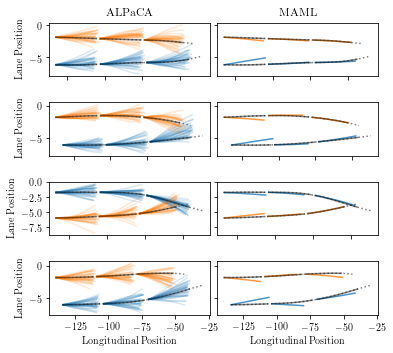

In [15]:
N_examples = 4
plt.figure(figsize=(5.5,9))
for i, ind in enumerate(np.random.choice(100, N_examples)):
    ax1 = plt.subplot(N_examples*2, 2, 2*i + 1)
    plot_swerve(agent,X_test,Y_test,T_rollout=10,ind=ind)
    plt.ylabel('Lane Position')
    if i == 0:
        plt.title('ALPaCA')
    if i < N_examples - 1:
        plt.setp(ax1.get_xticklabels(), visible=False)
    if i == N_examples - 1:
        plt.xlabel('Longitudinal Position')
        
    ax3 = plt.subplot(N_examples*2, 2, 2*i + 2, sharey=ax1)
    plot_swerve_maml(maml_model,X_test,Y_test,T_rollout=10,ind=ind)
    if i == 0:
        plt.title('MAML')
    if i < N_examples - 1:
        plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax3.get_yticklabels(), visible=False)
    if i == N_examples - 1:
        plt.xlabel('Longitudinal Position')

plt.tight_layout(w_pad=0.0,h_pad=-0.5)
plt.savefig('figures/swerving_rollouts.pdf') 
plt.show()

In [20]:
# NLL computation
import time

def gaussian_nll(y,mu,Sig):
    _,T,n = y.shape
    total_logdet = 0
    total_quadform = 0
    
    for t in range(T):
        total_logdet += np.log(np.linalg.det(Sig[0,t,:,:])) #np.log(np.linalg.det(Sig))
        total_quadform += ((y[0:1,t,:]-mu[0:1,t,:]) @ (np.linalg.inv(Sig[0,t,:,:])) @ (y[0:1,t,:]-mu[0:1,t,:]).T)
    nll = n*np.log(2*np.pi) + (total_logdet + total_quadform)/T
    
    return 0.5*nll[0,0]

def MSE(y,mu):
    return np.mean( np.sum( (y-mu)**2, axis=-1) )

def get_stats(meas, N):
    mean = sum(meas)/N
    var = sum([(nl - mean)**2 for nl in meas])/(N-1)
    return mean, var

alpaca_nll_mean = []
alpaca_nll_var = []
alpaca_time_mean = []
alpaca_time_var = []
alpaca_mse_mean = []
alpaca_mse_var = []

maml_time_mean = []
maml_time_var = []
maml_mse_mean = []
maml_mse_var = []
maml5_mse_mean = []
maml5_mse_var = []

lpaca_nll_mean = []
lpaca_nll_var = []
lpaca_time_mean = []
lpaca_time_var = []


prior_nll_mean = []
prior_nll_var = []

N_test = 100
data_horz = 30
for j in range(0,data_horz):
    nll_list_alpaca = []
    nll_list_lpaca = []
    
    mse_list_alpaca = []
    mse_list_maml = []
    mse_list_maml5 = []

    time_list_alpaca = []
    time_list_maml = []
    time_list_lpaca = []
    
    nll_list_prior = []

    
    for ind in range(N_test):
        X_update = X_test[ind:(ind+1),:j,:]
        Y_update = Y_test[ind:(ind+1),:j,:]
        
        X_empty = X_test[ind:(ind+1),:0,:]
        Y_empty = Y_test[ind:(ind+1),:0,:]
                
        x_pt = X_test[ind:(ind+1),:,:]
        y_pt = Y_test[ind:(ind+1),:,:]
    
        t1_alpaca = time.process_time()
        y, s = agent.test(X_update, Y_update, x_pt)
        t2_alpaca = time.process_time()
        
        y_prior,s_prior = agent_nometa.test(X_empty, Y_empty, x_pt)
        
        t1_maml = time.process_time()
        y_maml, _ = maml_model.test(X_update, Y_update - X_update, x_pt)
        t2_maml = time.process_time()
        y_maml5, _ = maml_model.test(X_update, Y_update - X_update, x_pt, num_updates=5)
        t1_lpaca = time.process_time()
        y_lpaca,s_lpaca = agent_nometa.test(X_update, Y_update, x_pt)
        t2_lpaca = time.process_time()
        
        time_list_alpaca.append(t2_alpaca - t1_alpaca)
        time_list_maml.append(t2_maml - t1_maml)
        time_list_lpaca.append(t2_lpaca - t1_lpaca)
            
        nll_list_alpaca.append(gaussian_nll(y_pt,y,s))
        nll_list_lpaca.append(gaussian_nll(y_pt,y_lpaca,s_lpaca))
        nll_list_prior.append(gaussian_nll(y_pt,y_prior,s_prior))
        
        mse_list_alpaca.append(MSE(y_pt,y))
        mse_list_maml.append(MSE(y_pt-x_pt, y_maml))
        mse_list_maml5.append(MSE(y_pt-x_pt, y_maml5))
        
    nll_mean_alpaca, nll_var_alpaca = get_stats(nll_list_alpaca,N_test)
    nll_mean_lpaca, nll_var_lpaca = get_stats(nll_list_lpaca,N_test)
    nll_mean_prior, nll_var_prior = get_stats(nll_list_prior,N_test)

    time_mean_alpaca, time_var_alpaca = get_stats(time_list_alpaca,N_test)
    time_mean_lpaca, time_var_lpaca = get_stats(time_list_lpaca,N_test)
    
    mse_mean_alpaca, mse_var_alpaca = get_stats(mse_list_alpaca,N_test)
    mse_mean_maml, mse_var_maml = get_stats(mse_list_maml,N_test)
    mse_mean_maml5, mse_var_maml5 = get_stats(mse_list_maml5,N_test)
    
    alpaca_nll_mean.append(nll_mean_alpaca)
    alpaca_nll_var.append(nll_var_alpaca)
    
    lpaca_nll_mean.append(nll_mean_lpaca)
    lpaca_nll_var.append(nll_var_lpaca)
    
    prior_nll_mean.append(nll_mean_prior)
    prior_nll_var.append(nll_var_prior)
    
    alpaca_time_mean.append(time_mean_alpaca)
    alpaca_time_var.append(time_var_alpaca)
    
    lpaca_time_mean.append(time_mean_lpaca)
    lpaca_time_var.append(time_var_lpaca)
    
    alpaca_mse_mean.append(mse_mean_alpaca)
    alpaca_mse_var.append(mse_var_alpaca)
    
    maml_mse_mean.append(mse_mean_maml)
    maml_mse_var.append(mse_var_maml)
    
    maml5_mse_mean.append(mse_mean_maml5)
    maml5_mse_var.append(mse_var_maml5)

/home/apoorva/ALPaCA/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/apoorva/ALPaCA/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/apoorva/ALPaCA/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


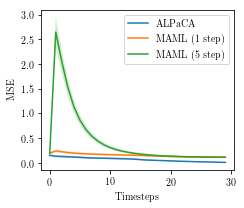

In [21]:
plt.figure(figsize=(3.5,3))
mse_plot(alpaca_mse_mean,alpaca_mse_var,maml_mse_mean,maml_mse_var,maml5_mse_mean,maml5_mse_var,N_test,legend=True)
plt.tight_layout()
plt.savefig('figures/mse_swerving.pdf')
plt.show()

/home/apoorva/ALPaCA/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/apoorva/ALPaCA/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


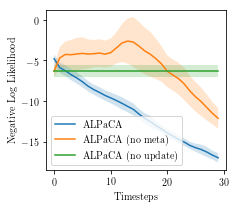

In [22]:
plt.figure(figsize=(3.5,3))
nll_plot(alpaca_nll_mean,alpaca_nll_var,lpaca_nll_mean,lpaca_nll_var,prior_nll_mean,prior_nll_var,N_test,legend=True,last_legend_label=r'ALPaCA (no update)')
plt.tight_layout()
plt.savefig('figures/nll_swerving.pdf')
plt.show()